In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

music_data = pd.read_csv("Resources/top10s.csv", encoding = "ISO-8859-1")

In [2]:
music_df = pd.DataFrame(music_data)


In [4]:
columns = {"title": "Title", "artist": "Artist", "top genre": "Top Genre", "year": "Year", "bpm": "Beats per Minute (BPM)", 
           "nrgy": "Energy", "dnce": "Danceability", "dB": "Loudness (dB)", "live": "Liveness", "val": "Valence", 
           "dur": "Duration (sec)", "acous": "Acousticness", "spch": "Speechiness", "pop": "Popularity"}

clean_music_df = music_df.rename(columns = columns)

clean_music_df


,Unnamed: 0,Title,Artist,Top Genre,Year,Beats per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [6]:
#Only focused on the colums that are important: Made a DF
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity','Top Genre'])
music_subset_data_df

,Title,Artist,Year,Energy,Danceability,Valence,Popularity,Top Genre
0,"Hey, Soul Sister",Train,2010,89,67,80,83,neo mellow
1,Love The Way You Lie,Eminem,2010,93,75,64,82,detroit hip hop
2,TiK ToK,Kesha,2010,84,76,71,80,dance pop
3,Bad Romance,Lady Gaga,2010,92,70,71,79,dance pop
4,Just the Way You Are,Bruno Mars,2010,84,64,43,78,pop
...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,2019,66,61,16,75,dance pop
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,2019,79,75,61,75,pop
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,2019,76,53,65,70,dance pop
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,2019,79,60,24,69,dance pop


In [7]:
#Changed all subgenres of 'pop' to pop
music_subset_data_df['Top Genre'] = music_subset_data_df['Top Genre'].replace(
    {"acoustic pop":"pop",
"art pop":"pop",
"australian pop":"pop","barbadian pop":"pop","baroque pop":"pop",
     "canadian pop":"pop","candy pop":"pop","colombian pop":"pop",
     "dance pop":"pop","danish pop":"pop","electropop":"pop",
     "folk-pop":"pop","french indie pop":"pop","hip pop":"pop",
     "indie pop":"pop","moroccan pop":"pop"})


In [8]:
#Averages of the DataFrame
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


In [9]:
#Indexed by genre and defined pop variables
genre_indexed = music_subset_data_df.set_index("Top Genre")


pop_valence = genre_indexed.loc["pop", "Valence"]

pop_energy = genre_indexed.loc["pop", "Energy"]

pop_danceability = genre_indexed.loc["pop", "Danceability"]

pop_popularity = genre_indexed.loc["pop", "Popularity"]


In [ ]:
# genres = music_genre_group["Top Genre"].unique()
# no_pop_genres = ['alaska indie', 'alternative r&b', 'atl hip hop', 
#                  'australian dance', 'australian hip hop', 'belgian edm', 
#                  'big room', 'boy band', 'british soul', 'brostep',
#                  'canadian contemporary r&b', 'canadian hip hop', 'canadian latin', 
#                  'celtic rock', 'chicago rap', 'complextro', 'contemporary country',
#                  'detroit hip hop', 'downtempo', 'edm', 'electro', 'electro house', 
#                  'electronic trap', 'escape room', 'hip hop', 'hollywood', 'house', 
#                  'irish singer-songwriter', 'latin', 'metropopolis', 'neo mellow',
#                  'permanent wave', 'tropical house']

In [10]:
#Made a DF with no pop songs

no_pop = genre_indexed.drop('pop')
no_pop_df = pd.DataFrame(no_pop)


no_pop_df_grouped = no_pop_df.groupby('Year')
no_pop_means = no_pop_df_grouped.mean()
no_pop_means_df = pd.DataFrame(no_pop_means)
no_pop_means_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,87.833333,66.333333,57.500000,56.333333
2011,66.000000,59.250000,37.000000,69.500000
2012,72.750000,62.750000,50.250000,76.250000
2013,74.562500,59.812500,49.500000,66.000000
2014,59.133333,53.933333,38.666667,62.600000
2015,67.888889,56.888889,36.666667,67.944444
2016,58.176471,54.941176,38.235294,57.882353
2017,69.100000,59.850000,45.650000,68.100000
2018,65.222222,63.444444,43.444444,72.666667


In [11]:
#Defined Variables: 
pval_mean = pop_valence.mean()
pnrg_mean = pop_energy.mean()
pdance_mean = pop_danceability.mean()


all_valence = avg_music_data_by_year_df["Valence"]
all_nrg = avg_music_data_by_year_df["Energy"]
all_dance = avg_music_data_by_year_df["Danceability"]


no_pop_val = no_pop_means_df["Valence"]
no_pop_nrg = no_pop_means_df["Energy"]
no_pop_dance = no_pop_means_df["Danceability"]

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]




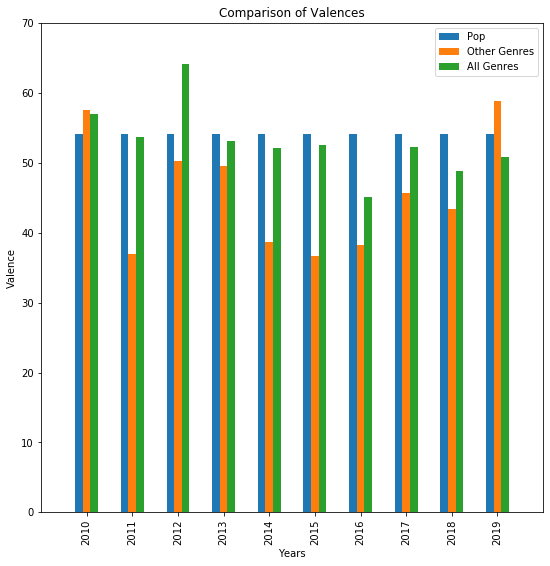

In [12]:
avg_valence_df = pd.DataFrame({"Pop": pval_mean,"Other Genres":no_pop_val, "All Genres":all_valence}, index=years)
ax=avg_valence_df.plot.bar(width =.5,figsize=(9,9))
ax.set_ylabel('Valence')
ax.set_xlabel('Years')
ax.set_title('Comparison of Valences')

plt.ylim(0,70)
plt.xlim(-1,10)
plt.savefig("ValenceCompare.png")

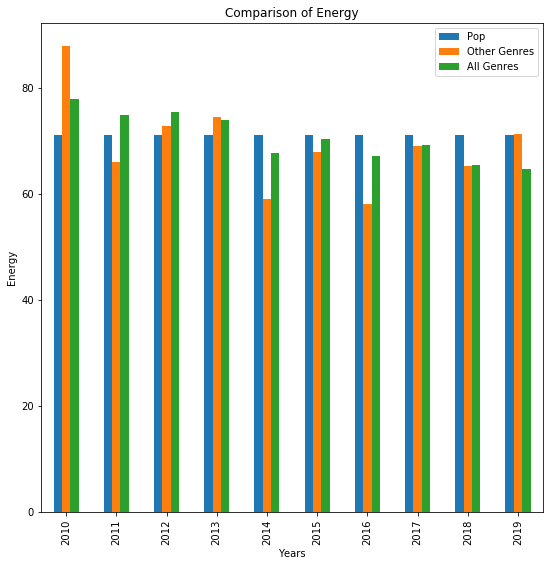

In [13]:
avg_energy_df = pd.DataFrame({"Pop": pnrg_mean,"Other Genres":no_pop_nrg, "All Genres":all_nrg}, index=years)
ax=avg_energy_df.plot.bar(width =.5,figsize=(9,9))
ax.set_ylabel('Energy')
ax.set_xlabel('Years')
ax.set_title('Comparison of Energy')
plt.savefig("EnergyCompare.png")

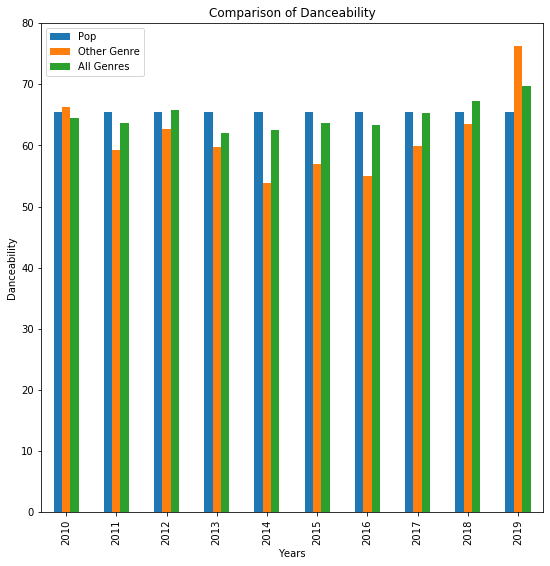

In [14]:
avg_dance_df = pd.DataFrame({"Pop": pdance_mean, "Other Genre":no_pop_dance,
                             "All Genres":all_dance}, index=years)
ax=avg_dance_df.plot.bar(width =.5,figsize=(9,9))
ax.set_ylabel('Danceability')
ax.set_xlabel('Years')
ax.set_title('Comparison of Danceability')
plt.savefig("DanceCompare.png")